In [17]:
import pandas as pd
import numpy as np

In [31]:
df = pd.read_csv(r"C:\Users\MAYANK RATHVA\100 days of ML\placement.csv")

In [33]:

df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [37]:
df.shape

(100, 4)

In [39]:
df = df.iloc[:,1:]

In [41]:


df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [43]:
# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model
     



In [45]:
import matplotlib.pyplot as plt

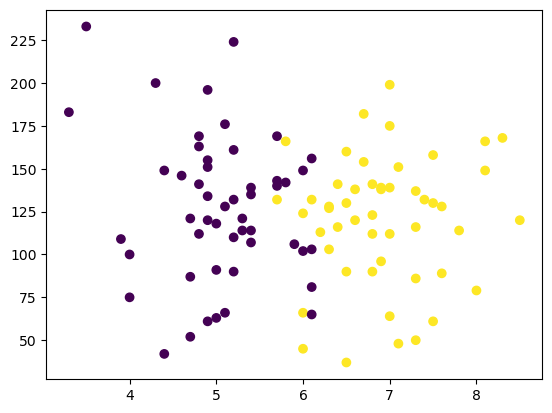

In [47]:

plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [49]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]
     

In [53]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [57]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [59]:

y.shape

(100,)

In [61]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)
     

In [63]:
X_train

,cgpa,iq
80,4.9,196.0
18,4.0,100.0
24,4.7,121.0
3,7.4,132.0
83,7.5,130.0
...,...,...
63,6.3,128.0
21,7.1,151.0
28,5.2,90.0
77,7.3,50.0


In [65]:

y_train

80    0
18    0
24    0
3     1
83    1
     ..
63    1
21    1
28    0
77    1
87    1
Name: placement, Length: 90, dtype: int64

In [67]:

X_test

,cgpa,iq
58,8.0,79.0
43,6.8,141.0
5,7.1,48.0
16,5.2,224.0
51,4.8,141.0
19,5.2,132.0
72,7.3,116.0
79,6.5,90.0
98,6.3,103.0
37,8.1,149.0


In [69]:
from sklearn.preprocessing import StandardScaler

In [73]:
scaler = StandardScaler()  #make object

In [77]:
X_train = scaler.fit_transform(X_train)

In [79]:
X_train

array([[-0.91595382,  1.85091129],
       [-1.71543937, -0.60748587],
       [-1.09361727, -0.06971149],
       [ 1.30483938,  0.21197985],
       [ 1.39367111,  0.16076324],
       [-1.00478554,  1.15948709],
       [-0.02763654, -0.45383605],
       [-0.91595382,  0.26319645],
       [-0.73829036,  0.10954663],
       [ 0.06119519, -2.01594258],
       [ 0.86068074,  0.36562967],
       [-1.36011246,  0.64732101],
       [ 2.28198839, -0.0953198 ],
       [-0.91595382, -1.60620972],
       [ 0.77184901, -0.86356891],
       [ 0.4165221 , -0.19775301],
       [ 0.15002692,  0.82657914],
       [ 0.06119519, -0.55626926],
       [-0.5606269 , -0.06971149],
       [ 0.50535383, -2.22080901],
       [-0.91595382, -0.0953198 ],
       [-1.09361727, -1.83668445],
       [ 0.59418556,  0.36562967],
       [ 0.15002692, -1.09404364],
       [-1.09361727, -0.94039382],
       [ 0.94951247, -1.52938481],
       [-0.5606269 , -0.24896962],
       [-2.33726146,  1.51800334],
       [ 0.68301729,

In [81]:
X_test = scaler.transform(X_test)

In [85]:
X_test

array([[ 1.83782975, -1.14526025],
       [ 0.77184901,  0.44245458],
       [ 1.0383442 , -1.93911767],
       [-0.64945863,  2.56794379],
       [-1.00478554,  0.44245458],
       [-0.64945863,  0.21197985],
       [ 1.21600765, -0.19775301],
       [ 0.50535383, -0.86356891],
       [ 0.32769037, -0.53066096],
       [ 1.92666148,  0.64732101]])

In [87]:
# now we train the model

In [89]:
from sklearn.linear_model import LogisticRegression

In [91]:
clf = LogisticRegression()

In [95]:
# model training

clf.fit(X_train,y_train)

LogisticRegression()

In [105]:
y_pred = clf.predict(X_test)

In [101]:
y_test

58    1
43    1
5     1
16    0
51    0
19    0
72    1
79    1
98    1
37    1
Name: placement, dtype: int64

In [103]:
from sklearn.metrics import accuracy_score

In [107]:
accuracy_score(y_test,y_pred)

1.0

In [117]:
# how to plot decision boundary
!pip install mlxtend
from mlxtend.plotting import plot_decision_regions

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   ----------------------- ---------------- 0.8/1.4 MB 2.2 MB/s eta 0:00:01
   -------------------------------------- - 1.3/1.4 MB 2.2 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 2.2 MB/s eta 0:00:00


<Axes: >

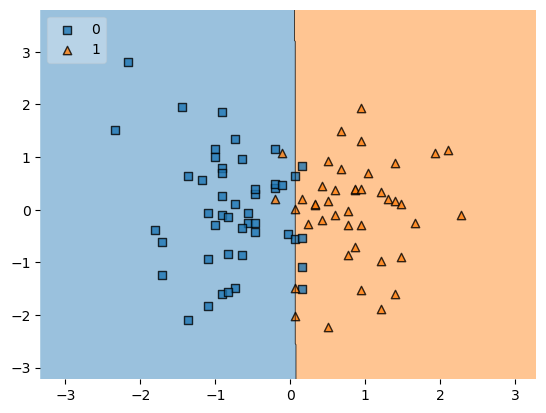

In [118]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)
     

In [121]:
import pickle
     

In [123]:

pickle.dump(clf,open('model.pkl','wb'))